In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score, cross_val_predict
import skimage
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from skimage.transform import resize, rescale
from sklearn.model_selection import KFold,StratifiedKFold

from skimage import io
import pandas as pd
#histogram, bar graph,

## 7) Research the Airfoil Self-Noise data set - Yoonju Hwang

https://archive.ics.uci.edu/ml/datasets/airfoil+self-noise (UCI Machine Learning Repository)

Data set comprises different size airfoils at various wind tunnel speeds and angles of attack.

and develop an algorithm that can predict the scaled sound pressure level, in decibels with a high R2 score. This (like the above) is a relatively simple problem with many chances to do nice data visualization and where it is important to describe the problem and the data well and to have a complete solution.

#### r2 score is regression score function

Input - frequency- in Hertz

Input - angle_of_attack- in degrees

Input - chord_length- in meters

Input - free_stream_velocity- in meters per second

Input - suction_side_displacement_thickness- in meters

Target - scaled_sound_pressure_level- in decibels

In [31]:
airfoil = pd.read_csv('airfoil_self_noise.csv')
airfoil.head()

,Frequency,Angle of Attack,Chord Length,Free Stream Velocity,Suction Side Displacement Thickness,Scaled Sound Pressure Level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


#### 6 columns (variables),  1503 rows (instances)

In [3]:
# print (airfoil['Scaled Sound Pressure Level'].min())
# print (airfoil['Scaled Sound Pressure Level'].max())

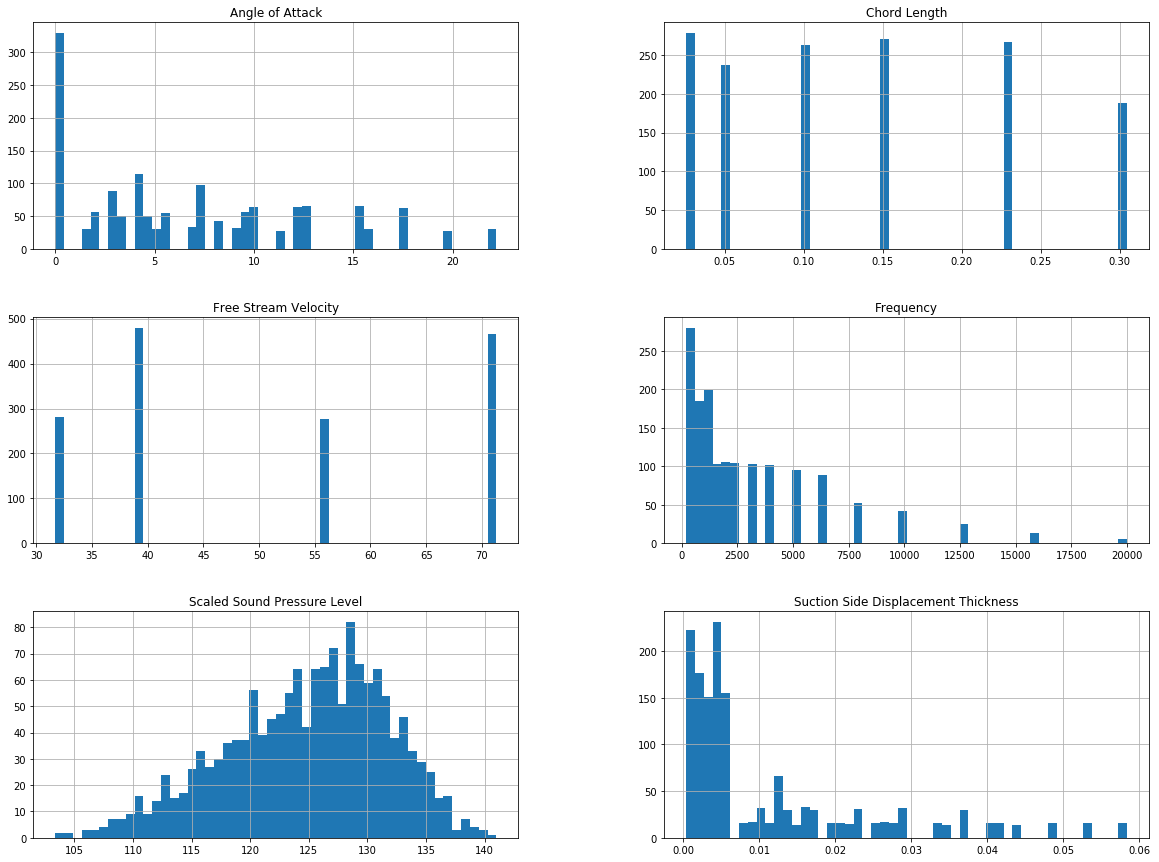

In [4]:
airfoil.hist(bins=50, figsize=(20,15)) #Plot Histogram width, height in inches
plt.show()

 ## SUPERVISED / REGRESSION - There are 5 features and 1 target value.
 
 ### I used Linear Regression, Random Forest Regression and ExtraTrees Regression to get highest R2 Score.

In [5]:
#This uses only one feature (scaled_sound_pressure_level)
from sklearn import metrics
from sklearn.utils import shuffle
X = airfoil [['Frequency','Angle of Attack','Chord Length','Free Stream Velocity','Suction Side Displacement Thickness']].values
y = airfoil['Scaled Sound Pressure Level'].values
X, y = shuffle(X, y)

# Linear Regression

In [6]:
model = LinearRegression()
pred = cross_val_predict(model,X, y, cv=5)

print ("Linear  Regression r2 score = ",metrics.r2_score(y,pred))


Linear  Regression r2 score =  0.5101040219690411


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

def checktraintestreg(X, y, model, ntrials =5, test_size = 0.2):

    scores_train = np.zeros(ntrials)
    scores_test = np.zeros(ntrials)

    for i in range(ntrials):
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=test_size, random_state=i)
        model.fit(X_train, y_train)
        pred_test = model.predict(X_test)
        pred_train = model.predict(X_train)

        scores_test[i] = (metrics.r2_score(y_test,pred_test))
        scores_train[i] =(metrics.r2_score(y_train,pred_train))

    print('Training scores '+str(scores_train.mean())+' +- '+str(scores_train.std()))
    print('Test scores '+str(scores_test.mean())+' +- '+str(scores_test.std()))

# Ranom Forest Regressor

In [8]:
checktraintestreg(X,y,RandomForestRegressor(n_estimators = 20)) #The number of trees in the forest.

Training scores 0.9879760522312001 +- 0.00039209841705182446
Test scores 0.9225430342916852 +- 0.014021182972522674


# Extra Trees Regression

In [9]:
checktraintestreg(X,y,ExtraTreesRegressor(n_estimators=20))

Training scores 0.9999999897738896 +- 2.0452221027866813e-08
Test scores 0.9443126496165621 +- 0.012429908393962217


## I get lower test scores if I insert max_depth=5 and min_samples =8

In [10]:
checktraintestreg(X,y,ExtraTreesRegressor(n_estimators=20,max_depth=5,min_samples_leaf=8))

Training scores 0.6720664081219433 +- 0.010371491067468736
Test scores 0.6308864972823253 +- 0.02012106493750908


## Lower min_samples_leaf made test score 0.06 higher than above

In [11]:
checktraintestreg(X,y,ExtraTreesRegressor(n_estimators=20,min_samples_leaf=1)) #The minimum number of samples required to be at a leaf node.

Training scores 0.9999999665848179 +- 5.448412601015273e-08
Test scores 0.9449551441442103 +- 0.008767349144007541


## Add higher max_depth makes test scores high.

In [28]:
checktraintestreg(X,y,ExtraTreesRegressor(n_estimators=20,min_samples_leaf=1, max_depth=17))

Training scores 0.9999552146351703 +- 1.88725256865509e-05
Test scores 0.9443987667758105 +- 0.008633981028848768


In [12]:
predicted_RFR = cross_val_predict(RandomForestRegressor(n_estimators=20), X, y)

C:\Users\YH\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [13]:
predicted_ETR = cross_val_predict(ExtraTreesRegressor(n_estimators=20), X, y)

C:\Users\YH\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


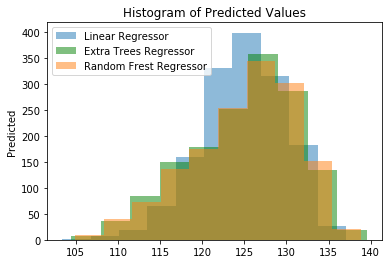

In [30]:
plt.hist(pred,alpha = 0.5, label = 'Linear Regressor')
plt.hist(predicted_ETR,alpha = 0.5, color='green',label = 'Extra Trees Regressor')
plt.hist(predicted_RFR,alpha = 0.5, label = 'Random Frest Regressor')
plt.title('Histogram of Predicted Values')
plt.ylabel('Predicted')
plt.legend();

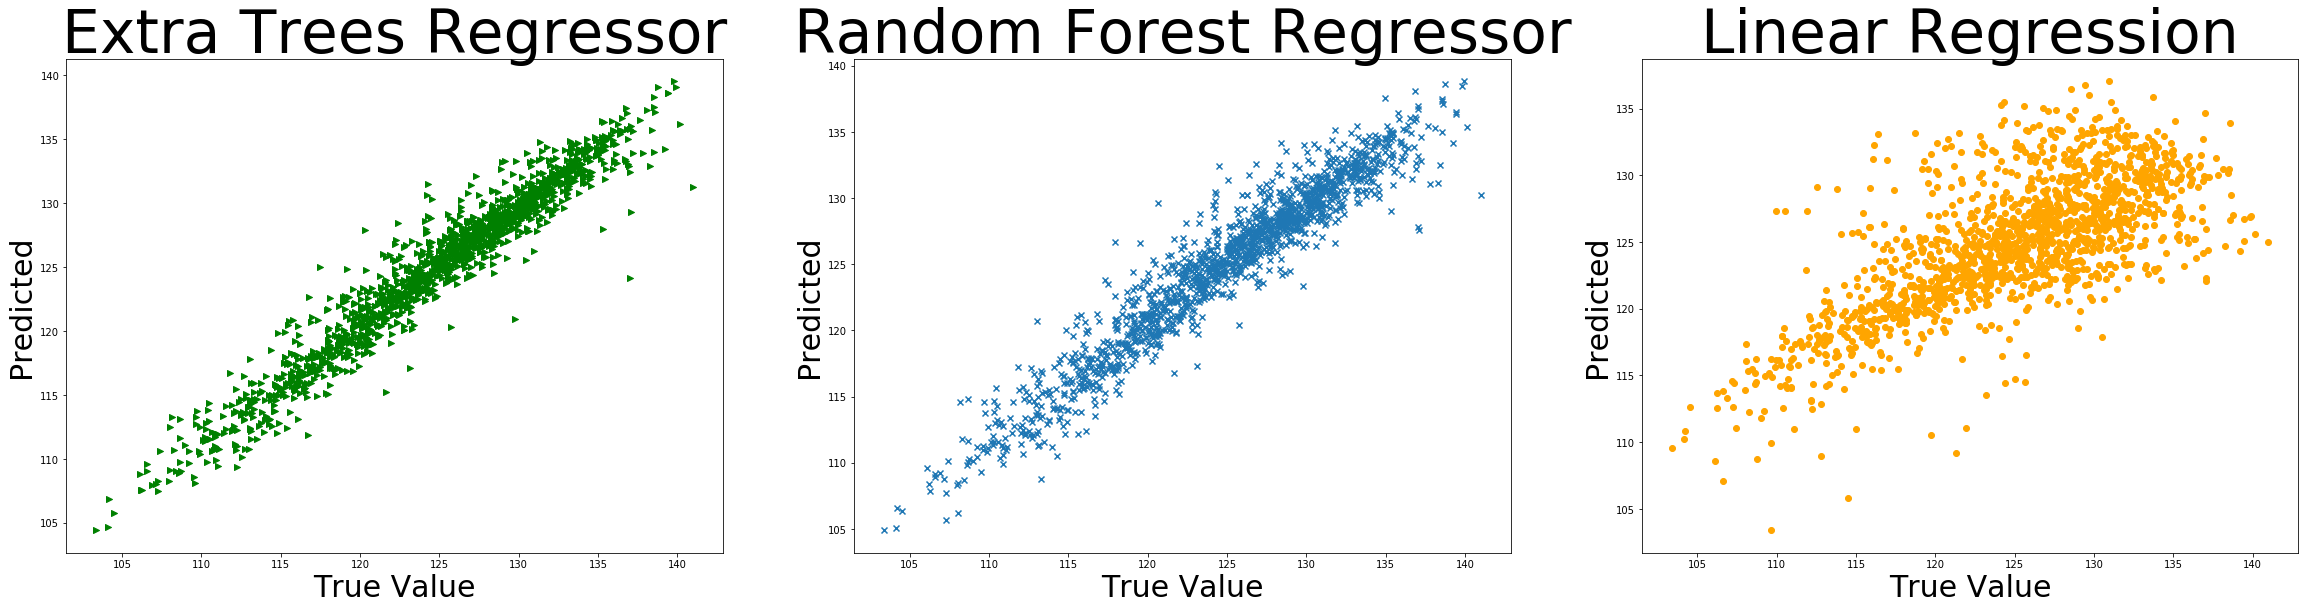

In [15]:
plt.figure(figsize=(40,20))

plt.subplot (231)
plt.scatter(y,predicted_ETR, color = 'green',marker='>')
plt.title("Extra Trees Regressor",fontsize=60)
plt.xlabel('True Value',fontsize=30);
plt.ylabel('Predicted',fontsize=30);



plt.subplot (232)
plt.scatter(y,predicted_RFR, marker='x')
plt.title("Random Forest Regressor",fontsize=60)
plt.xlabel('True Value',fontsize=30);
plt.ylabel('Predicted',fontsize=30);




plt.subplot (233)
plt.scatter(y,pred,color='orange', marker='o')
plt.title("Linear Regression",fontsize=60)
plt.xlabel('True Value',fontsize=30);
plt.ylabel('Predicted',fontsize=30);




plt.show()

## Grid Search Cross Validation

In [19]:
number_samples = X.shape[0] #total size of data set 

Xlittle, ylittle = X[:int(number_samples*0.1),:], y[:int(number_samples*0.1)] #what does this do?

In [20]:
import time #This is to see how long things take
from sklearn.model_selection import GridSearchCV
#Important! COMMENT

#Outer k-fold:
    
outercv = StratifiedKFold(n_splits=5, shuffle=True) #creates 5 disjoint splits

innercv = StratifiedKFold(n_splits=3, shuffle=True) #creates 4 disjoint splits

i=0

winning_model_scores = []

for train_index, test_index in outercv.split(Xlittle,ylittle): #This runs the outer cross validation
    
    i+=1
    
    print('Fold ' ,i, 'outer cross validation')
    
    Xlittle_train = Xlittle[train_index] #"yellow" training set
    ylittle_train = ylittle[train_index]
    
    Xlittle_test = Xlittle[test_index]
    ylittle_test = ylittle[test_index]
    
   
    parameters = {'n_estimators':[5,10,20],'min_samples_leaf':[1, 2, 5], 'min_samples_split':[2, 5, 10], 'max_features':[3,6,8]}

    nmodels = np.product([len(el) for el in parameters.values()])
    start = time.time()
    model = GridSearchCV(ExtraTreesRegressor(), parameters, cv = innercv,  \
                     verbose = 2, n_jobs = -1)
    model.fit(Xlittle_train, ylittle_train)
    stop = time.time()
    print('Best params, best score:', "{:.4f}".format(model.best_score_), model.best_params_)
    print('Time per model (s):', "{:.4f}".format((stop-start)/float(nmodels*4)))

    #Compute test scores with optimal parameters on outer i-th test fold
    
    winner = model.best_estimator_
    
    winner.fit(Xlittle_train, ylittle_train)
    
    ypred = winner.predict(Xlittle_test)
    
    winning_model_scores.append(metrics.recall_score(ylittle_test,ypred)) #append this to the outer cv results
    
print('The average of the winning model scores (i.e. the generalization error) is', \
      np.mean(winning_model_scores), np.std(winning_model_scores) )


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

## Extra Trees Regressor with min_samples_leaf=1 has highest R2 score when predict the Scaled Sound Pressure Level.

## Work Cited

https://archive.ics.uci.edu/ml/datasets/airfoil+self-noise#

https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878

LinearRegression_Apr2 and RF_ERT_Example worksheets
